In [21]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import table 
PATH = os.path.abspath('')
OUTPUT_DIR = 'outputs'
INSTANCES = 10

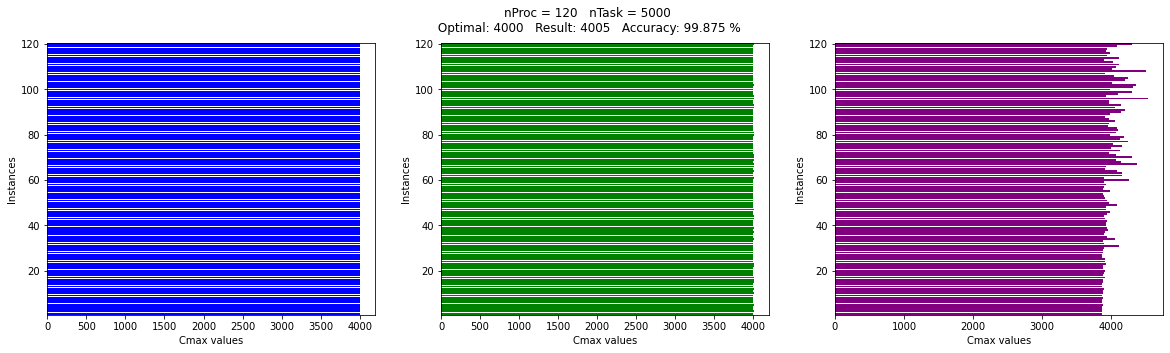

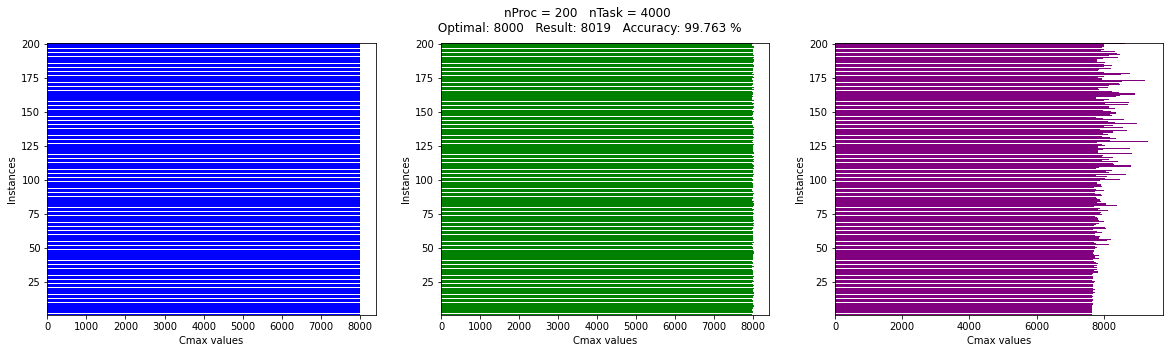

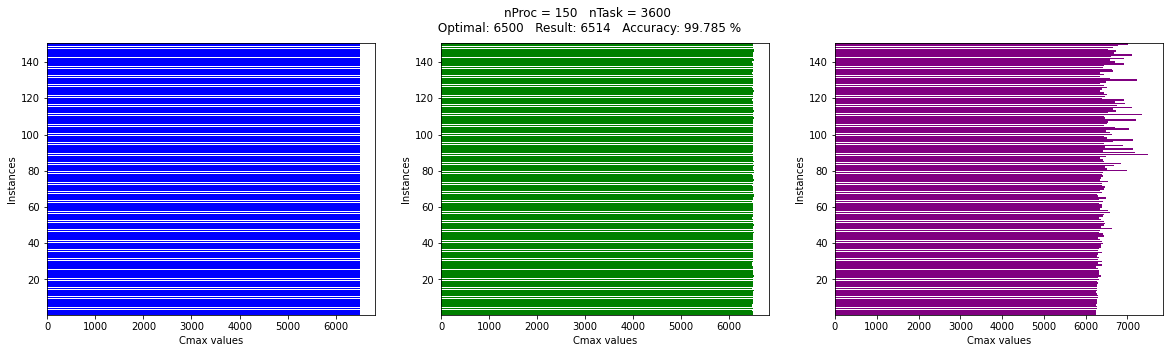

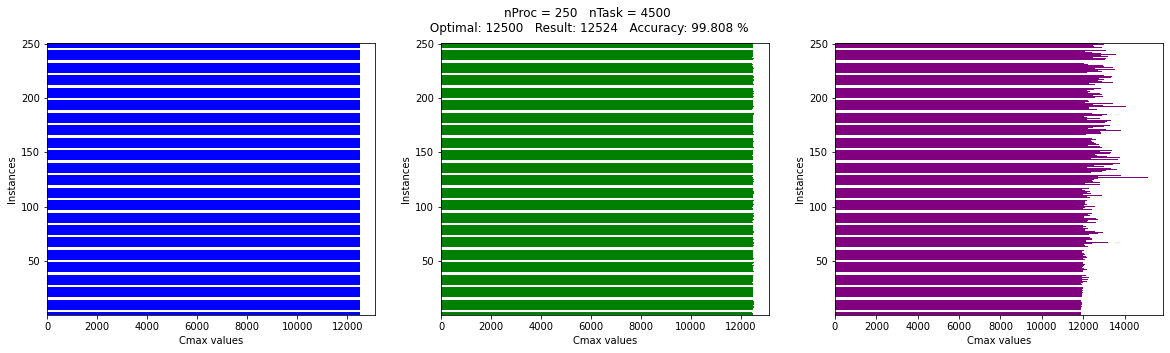

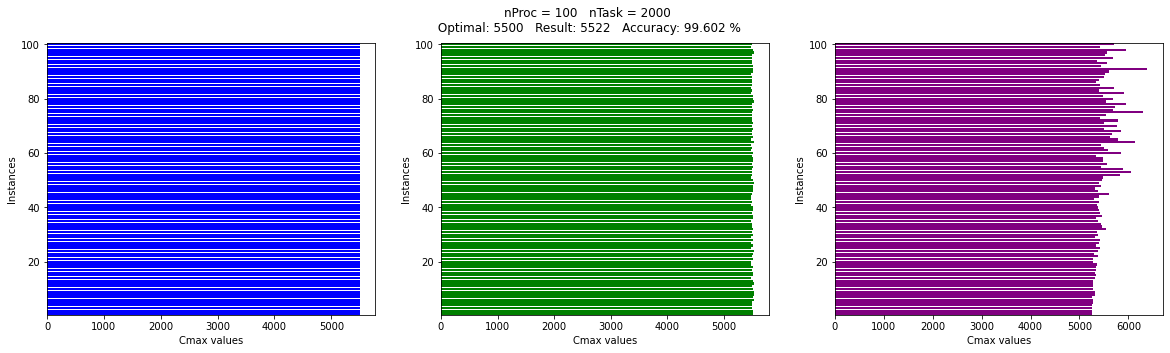

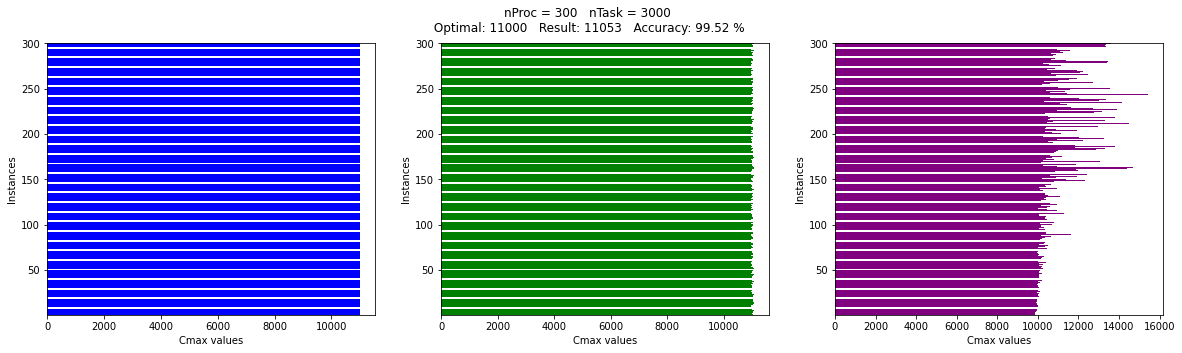

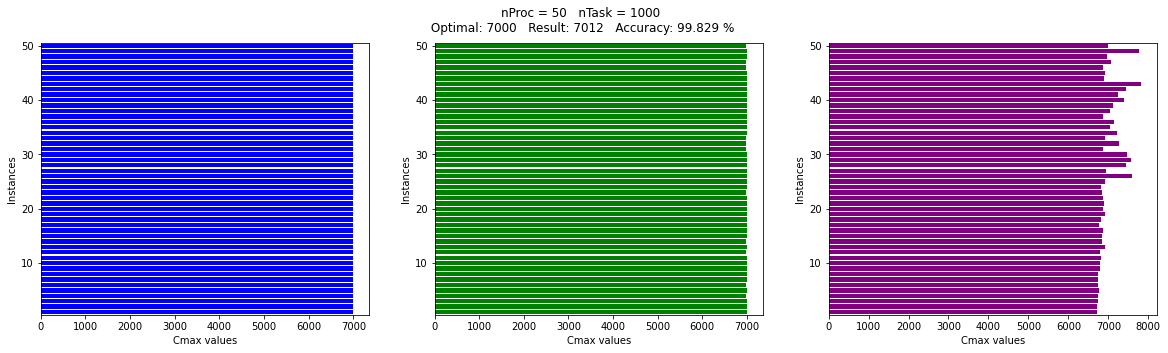

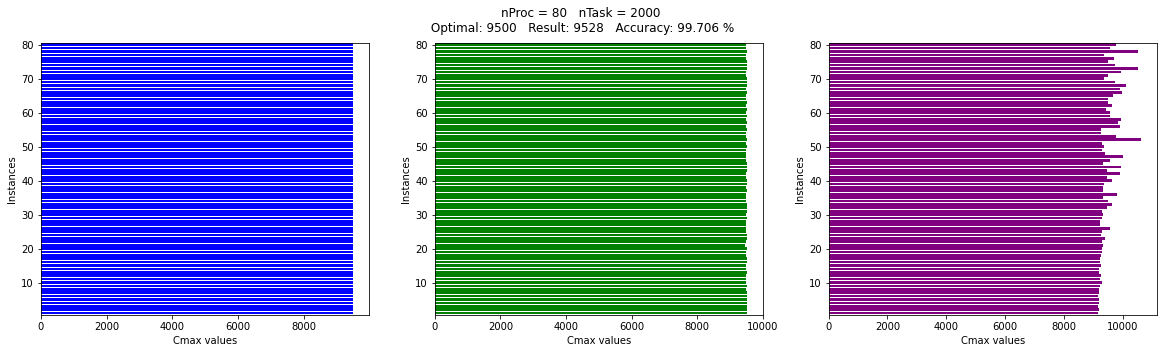

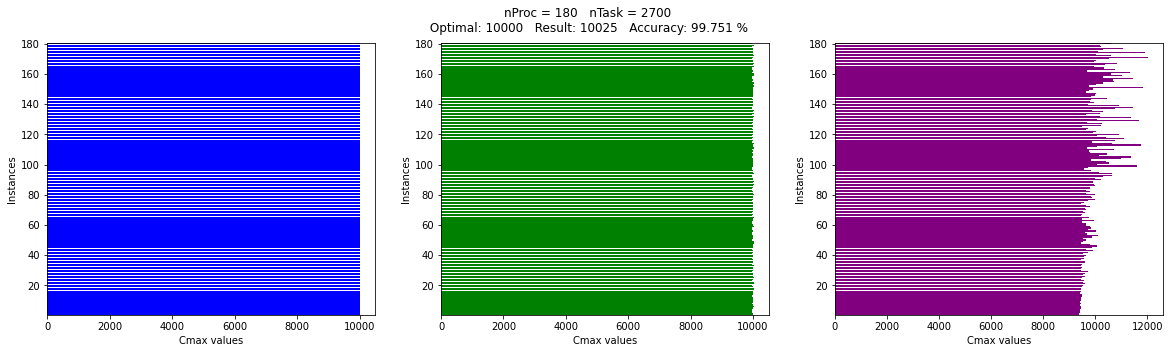

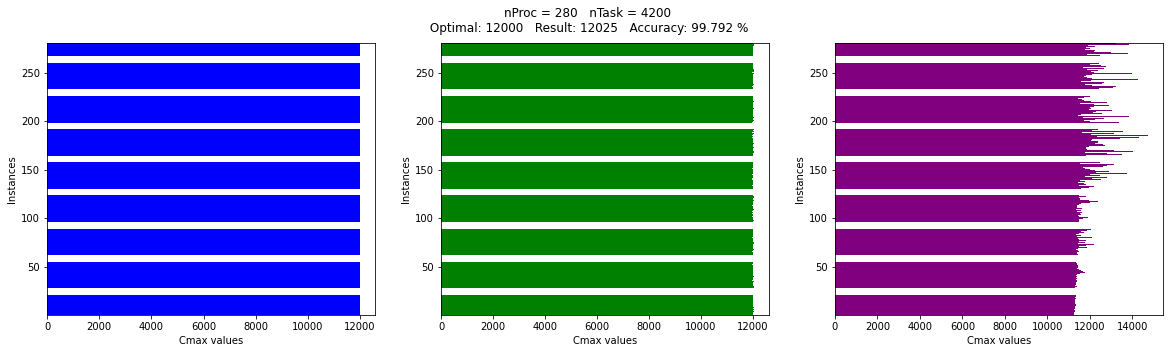

In [9]:
summary = []
performances = {'ev': [], 'gr': []}

def createSubPlot(ax, x, clr, max_val):
    ax.barh(y,x,color=clr)
    ax.set(ylim=(0.5,max_val+0.5))
    ax.set_xlabel('Cmax values')
    ax.set_ylabel('Instances')
    
        
for i in range(1,INSTANCES+1):
    ev = open('{}/ev/evolutional_{}'.format(OUTPUT_DIR,i), 'r')
    Cmax = int(ev.readline())
    nProc = int(ev.readline()) 
    nTask = int(ev.readline())

    gr = open('{}/gr/greedy_{}'.format(OUTPUT_DIR,i), 'r')
    _ = [gr.readline() for _ in range(3)] # Cmax, nProc, nTask    
    
    y = np.arange(1,nProc+1)
    x_opt = [Cmax for _ in range(nProc)] # optimal 
    x_ev = [int(line) for line in ev.readlines()] # evolutional
    x_gr = [int(line) for line in gr.readlines()] # greedy
    ev.close()
    gr.close()
    
    ev_accuracy = round(Cmax / max(x_ev) * 100,3)
    gr_accuracy = round(Cmax / max(x_gr) * 100,3)
    
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    fig.suptitle("nProc = {}   nTask = {}\n Optimal: {}   Result: {}   Accuracy: {} %".format(nProc, nTask, Cmax, max(x_ev), ev_accuracy))

    createSubPlot(ax[0], x_opt, 'blue', nProc)
    createSubPlot(ax[1], x_ev, 'green', nProc)
    createSubPlot(ax[2], x_gr, 'purple', nProc)

    plt.savefig(PATH + '/plots/plots_{}.svg'.format(i))
    plt.show()
    
    summary.append([Cmax, max(x_ev), max(x_gr), ev_accuracy, gr_accuracy])


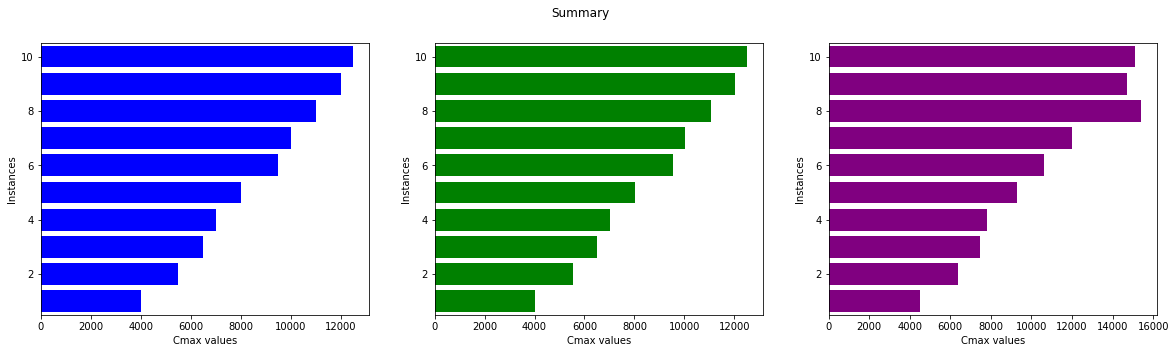

In [10]:
summary.sort(key=lambda x: x[0])
    
# podsumowanie wyników dla każdej instancji
y = np.arange(1,INSTANCES+1)
x_opt = [el[0] for el in summary]
x_ev = [el[1] for el in summary]
x_gr = [el[2] for el in summary]


fig, ax = plt.subplots(1,3,figsize=(20,5))
fig.suptitle("Summary")
createSubPlot(ax[0], x_opt, 'blue', INSTANCES)
createSubPlot(ax[1], x_ev, 'green', INSTANCES)
createSubPlot(ax[2], x_gr, 'purple', INSTANCES)

plt.savefig(PATH + '/plots/summary.svg')
plt.show()


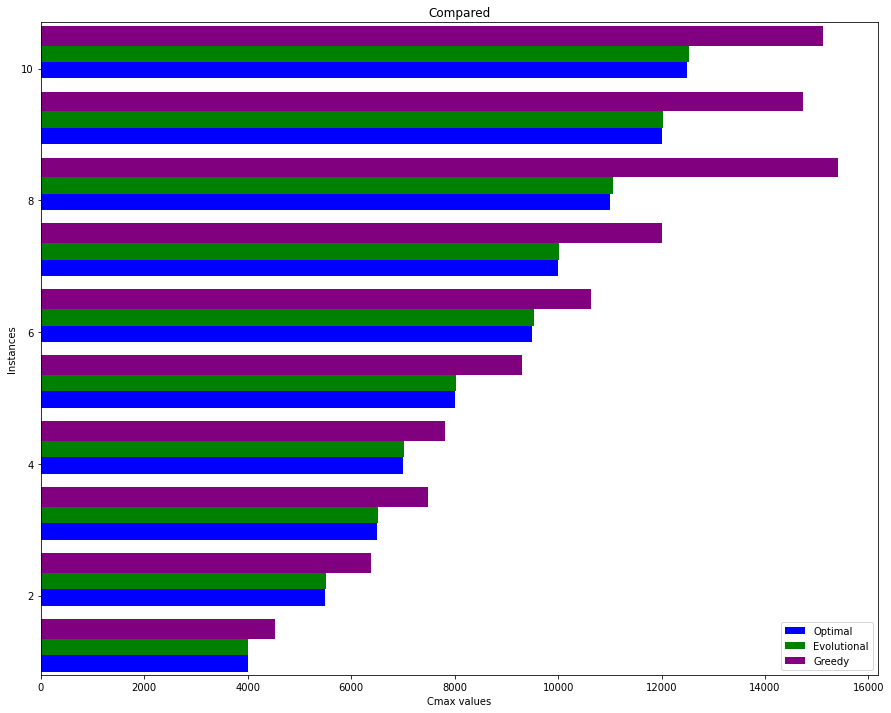

In [4]:
plt.figure(figsize=(15,12))
plt.ylim(0.8,INSTANCES+0.7)
plt.barh(y, x_opt, color='blue', height=0.3)
plt.barh(y+0.25, x_ev, color='green', height=0.3)
plt.barh(y+0.5, x_gr, color='purple', height=0.3)
plt.legend(["Optimal", "Evolutional", "Greedy"])
plt.title('Compared')
plt.xlabel('Cmax values')
plt.ylabel('Instances')
plt.savefig(PATH + '/plots/compared.svg')
plt.show()

In [31]:
import dataframe_image as dfi

data = {'Optimal':[el[0] for el in summary],
       'Greedy':[el[2] for el in summary],
       'Greedy Accuracy':[el[4] for el in summary],
       'Evolutional':[el[1] for el in summary],
       'Evolutional Accuracy':[el[3] for el in summary]}
df = pd.DataFrame(data)
df.index = np.arange(1, len(df)+1)

dfi.export(df,PATH+"/plots/data.svg")
df

,Optimal,Greedy,Greedy Accuracy,Evolutional,Evolutional Accuracy
1,4000,4525,88.398,4005,99.875
2,5500,6390,86.072,5522,99.602
3,6500,7482,86.875,6514,99.785
4,7000,7821,89.503,7012,99.829
5,8000,9304,85.985,8019,99.763
6,9500,10627,89.395,9528,99.706
7,10000,12006,83.292,10025,99.751
8,11000,15410,71.382,11053,99.520
9,12000,14727,81.483,12025,99.792
10,12500,15111,82.721,12524,99.808
